In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

creating a manual dataset

In [19]:
df = pd.DataFrame()

In [20]:
df['Feature1'] = [1,2,3,4,5,6,6,7,9,9]
df['Feature2'] = [5,3,6,8,1,9,5,8,9,2]
df['target'] = [1,1,0,1,0,1,0,1,0,0]

In [21]:
df

,Feature1,Feature2,target
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [22]:
df.shape

(10, 3)

Relationship between the features in a given dataframe

<Axes: xlabel='Feature1', ylabel='Feature2'>

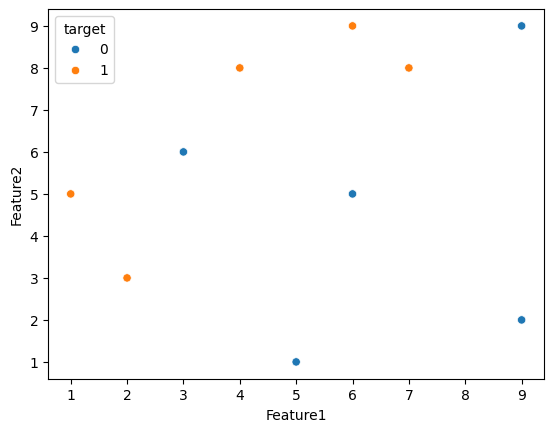

In [23]:
import seaborn as sns
sns.scatterplot(x=df['Feature1'], y=df['Feature2'], hue=df['target'])

In [24]:
df['weights'] = 1 / df.shape[0] #assigning each row weight of 0.1

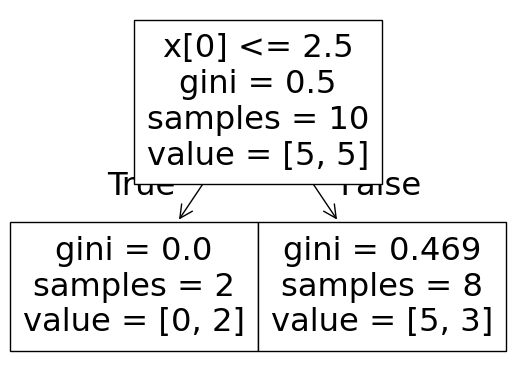

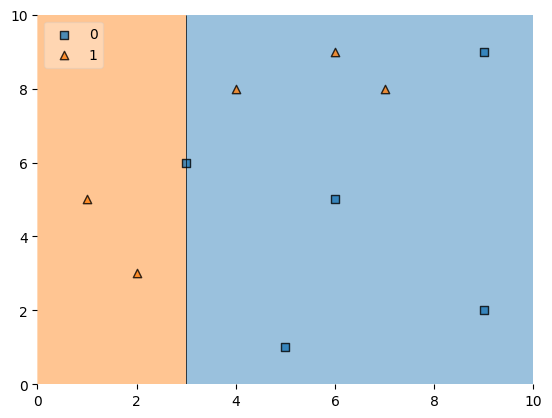

In [25]:
X = df.iloc[:, 0:2].values #converting the feature1 and feature2 to numpy array
y = df.iloc[:, 2].values #converting target into numpy array

dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X, y)

plot_tree(dt1)
plt.show()

plot_decision_regions(X, y, clf=dt1, legend=2)
plt.show()

df['y_pred'] = dt1.predict(X)

In [26]:
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

error1 = 0.3
alpha1 = calculate_model_weight(error1)
alpha1

np.float64(0.42364893019360184)

In [28]:
def update_row_weights(row, alpha):
    if row['target'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, alpha=alpha1, axis=1)
df

df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [29]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
index_values = create_new_dataset(df)
new_df = df.iloc[index_values, [0, 1, 2, 3]]
new_df

,Feature1,Feature2,target,weights
5,6,9,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
0,1,5,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
0,1,5,1,0.1


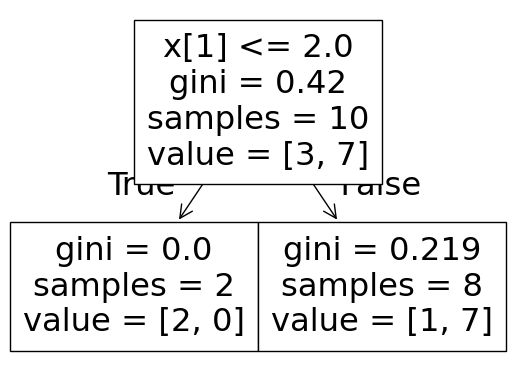

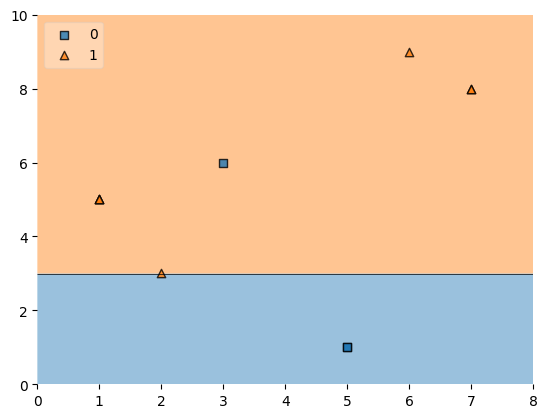

np.float64(1.0986122886681098)

In [30]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X_new, y_new)

plot_tree(dt2)
plt.show()

plot_decision_regions(X_new, y_new, clf=dt2, legend=2)
plt.show()

new_df['y_pred'] = dt2.predict(X_new)
new_df

error2 = 0.1
alpha2 = calculate_model_weight(error2)
alpha2

In [31]:
new_df['updated_weights'] = new_df.apply(update_row_weights, alpha=alpha2, axis=1)

new_df['normalized_weights'] = new_df['updated_weights'] / new_df['updated_weights'].sum()
new_df

,Feature1,Feature2,target,weights,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.033333,0.055556
7,7,8,1,0.1,1,0.033333,0.055556
0,1,5,1,0.1,1,0.033333,0.055556
1,2,3,1,0.1,1,0.033333,0.055556
4,5,1,0,0.1,0,0.033333,0.055556
0,1,5,1,0.1,1,0.033333,0.055556
4,5,1,0,0.1,0,0.033333,0.055556
2,3,6,0,0.1,1,0.300000,0.500000
7,7,8,1,0.1,1,0.033333,0.055556
0,1,5,1,0.1,1,0.033333,0.055556


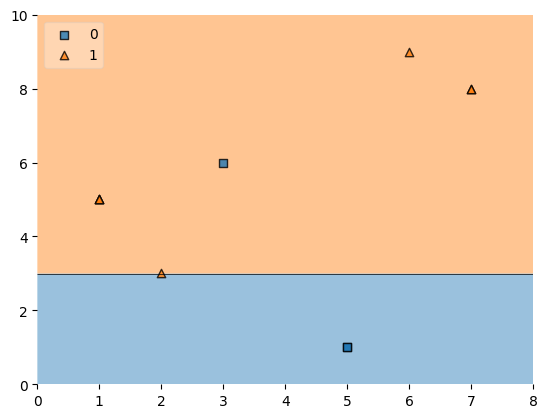

np.float64(-0.4236489301936017)

In [32]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X_new, y_new)

plot_decision_regions(X_new, y_new, clf=dt3, legend=2)
plt.show()

new_df['y_pred'] = dt3.predict(X_new)
new_df

error3 = 0.7
alpha3 = calculate_model_weight(error3)
alpha3

In [33]:
def final_prediction(query, classifiers, alphas):
    predictions = np.array([clf.predict(query) for clf in classifiers])
    final_score = np.dot(alphas, predictions)
    return np.sign(final_score)

classifiers = [dt1, dt2, dt3]
alphas = [alpha1, alpha2, alpha3]

query1 = np.array([1, 5]).reshape(1, -1)
query2 = np.array([9, 9]).reshape(1, -1)

print(final_prediction(query1, classifiers, alphas))
print(final_prediction(query2, classifiers, alphas))

[1.]
[1.]
